# Lab | Data Structuring and Combining Data

## Challenge 1: Combining & Cleaning Data

In this challenge, we will be working with the customer data from an insurance company, as we did in the two previous labs. The data can be found here:
- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv

But this time, we got new data, which can be found in the following 2 CSV files located at the links below.

- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file2.csv
- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file3.csv

Note that you'll need to clean and format the new data.

Observation:
- One option is to first combine the three datasets and then apply the cleaning function to the new combined dataset
- Another option would be to read the clean file you saved in the previous lab, and just clean the two new files and concatenate the three clean datasets

In [167]:
import pandas as pd

url = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv'
df = pd.read_csv(url)

df.columns = [column.lower() for column in df.columns]
df.columns = [column.replace(r' ','_') for column in df.columns]
df = df.rename(columns={'st':'state'})

df['gender'] = df['gender'].replace({
    'F': 'f',
    'M': 'm',
    'Male': 'm',
    'female': 'f',
    'Femal': 'f'
})
df['state'] = df['state'].replace({
    'WA' : 'Washington',
    'AZ' : 'Arizona'})
df['education'] = df['education'].replace({
    'Bachelors' : 'Bachelor'})
df['customer_lifetime_value'] = df['customer_lifetime_value'].replace(r'%','',regex=True)

df['vehicle_class'] = df['vehicle_class'].replace({
    'Luxury SUV' : 'Luxury',
    'Luxury Car' : 'Luxury'})

df['customer_lifetime_value'] = df['customer_lifetime_value'].astype(float)
df['number_of_open_complaints'] = df['number_of_open_complaints'].astype(str)
df['number_of_open_complaints'] = df['number_of_open_complaints'].apply(lambda x : x.split('/')[0])

df['gender'] = df['gender'].fillna('no identifiate') #All the null value in gender are now = non identifiate
df.dropna(axis=0, thresh=2, inplace=True)
df['customer_lifetime_value'] = df['customer_lifetime_value'].fillna(0)

df.drop_duplicates(subset=['state','gender','customer_lifetime_value','income','vehicle_class'],keep='first',inplace=True) 


url2 = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file2.csv"
dr = pd.read_csv(url2)

#corriger colonne

dr.columns = [column.lower() for column in dr.columns]
dr.columns = [column.replace(' ','_') for column in dr.columns]
dr = dr.rename(columns={'st':'state'})

#corriger valeur

dr['state'] = dr['state'].replace({'AZ' : 'Arizona'})
dr['gender'] = dr['gender'].replace({
    'female' : 'F',
    'Male' : 'M'})
dr['education'] = dr['education'].replace({'Bachelors' : 'Bachelor'})
dr['vehicle_class'] = dr['vehicle_class'].replace({
    'Luxury Car' : 'Luxury',
    'Luxury SUV' : 'Luxury'})

dr['customer_lifetime_value'] = dr['customer_lifetime_value'].astype(str)
dr['customer_lifetime_value'] = dr['customer_lifetime_value'].apply(lambda x : x.split('%')[0])
dr['customer_lifetime_value'] = dr['customer_lifetime_value'].astype(float)

dr['number_of_open_complaints'] = dr['number_of_open_complaints'].apply(lambda x : x.split('/')[1])

#gérer valeur nulle

dr['gender'] = dr['gender'].fillna('None identifiate')
dr['customer_lifetime_value'] = dr['customer_lifetime_value'].fillna(dr['customer_lifetime_value'].mean())

#pas de valeur dupliquée
dup_val = dr.duplicated(subset='customer').sum()


url3 = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file3.csv"
dd = pd.read_csv(url3)
#corriger colonne

dd.columns = [column.lower() for column in dd.columns]
dd.columns = [column.replace(' ','_') for column in dd.columns]


#corriger valeur
dd['vehicle_class'] = dd['vehicle_class'].replace({
    'Luxury Car' : 'Luxury',
    'Luxury SUV' : 'Luxury'})

#gérer les valeurs nulles
#pas de valeure nulle


#jointure
df_concat_outer = pd.concat([df, dr, dd], axis=0, join='outer')
display(df_concat_outer)
#display(df)
#display(dr)
#display(dd)

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,no identifiate,Master,0.000000e+00,0.0,1000.0,1,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,f,Bachelor,6.979536e+05,0.0,94.0,1,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,f,Bachelor,1.288743e+06,48767.0,108.0,1,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,m,Bachelor,7.645862e+05,0.0,106.0,1,Corporate Auto,SUV,529.881344
4,GA49547,Washington,m,High School or Below,5.363077e+05,36357.0,68.0,1,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,M,Bachelor,2.340599e+04,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,PK87824,California,F,College,3.096511e+03,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,TD14365,California,M,Bachelor,8.163890e+03,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,UP19263,California,M,College,7.524442e+03,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


# Challenge 2: Structuring Data

In this challenge, we will continue to work with customer data from an insurance company, but we will use a dataset with more columns, called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis_clean.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by performing data cleaning, formatting, and structuring.

In [44]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis_clean.csv")

df = df.drop(columns=['unnamed:_0'])


#invisble column :
#marital_status                    object
#monthly_premium_auto               int64
#months_since_last_claim          float64
#months_since_policy_inception      int64
#number_of_open_complaints        float64

#rename column
df = df.rename(columns={'employmentstatus':'employment_status'})

#rename val
df['vehicle_class'] = df['vehicle_class'].replace({
    'Luxury Car' : 'Luxury',
    'Luxury SUV' : 'Luxury'})

#check value : good
#check vall null : good

#check duplicate val 
df.drop_duplicates(subset=['customer','effective_to_date','vehicle_class'],keep='first',inplace=True)
df.reset_index(drop = True)

#le chiffre d'affaires total pour chaque canal de vente (agence, centre d'appels, Web et courrier)
#branch, call center, web, and mail).
grouped = df.groupby(['month','sales_channel']).agg({
    'total_claim_amount' : 'sum'})
    
df_pivot = df.pivot_table(index='month', columns='sales_channel', values='total_claim_amount', aggfunc='sum')

#2. Create a pivot table that shows the average customer lifetime value per gender and education level. Analyze the resulting table to draw insights.

df_pivot2 = df.pivot_table(index='gender', columns='education', values='customer_lifetime_value', aggfunc='mean')
df_pivot_grouped = df.groupby(['gender', 'education']).agg({'customer_lifetime_value':'mean'})

print(df_pivot)
print()
print(grouped)
print()
print(df_pivot2)
print()
print(df_pivot_grouped)
print()
display(df)



sales_channel          Agent         Branch    Call Center            Web
month                                                                    
1              838799.471652  625598.134269  410003.453809  316313.671081
2              733850.277001  518927.178392  373860.023028  280337.834750

                     total_claim_amount
month sales_channel                    
1     Agent               838799.471652
      Branch              625598.134269
      Call Center         410003.453809
      Web                 316313.671081
2     Agent               733850.277001
      Branch              518927.178392
      Call Center         373860.023028
      Web                 280337.834750

education     Bachelor      College       Doctor  High School or Below  \
gender                                                                   
F          8011.620310  7776.830147  7548.973667           8593.901714   
M          7796.123886  8082.364145  7592.708725           8187.410031   

educa

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,1
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury,Medsize,A,2
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury,Medsize,A,2


1. You work at the marketing department and you want to know which sales channel brought the most sales in terms of total revenue. Using pivot, create a summary table showing the total revenue for each sales channel (branch, call center, web, and mail).
Round the total revenue to 2 decimal points.  Analyze the resulting table to draw insights.

2. Create a pivot table that shows the average customer lifetime value per gender and education level. Analyze the resulting table to draw insights.

## Bonus

You work at the customer service department and you want to know which months had the highest number of complaints by policy type category. Create a summary table showing the number of complaints by policy type and month.
Show it in a long format table.

*In data analysis, a long format table is a way of structuring data in which each observation or measurement is stored in a separate row of the table. The key characteristic of a long format table is that each column represents a single variable, and each row represents a single observation of that variable.*

*More information about long and wide format tables here: https://www.statology.org/long-vs-wide-data/*

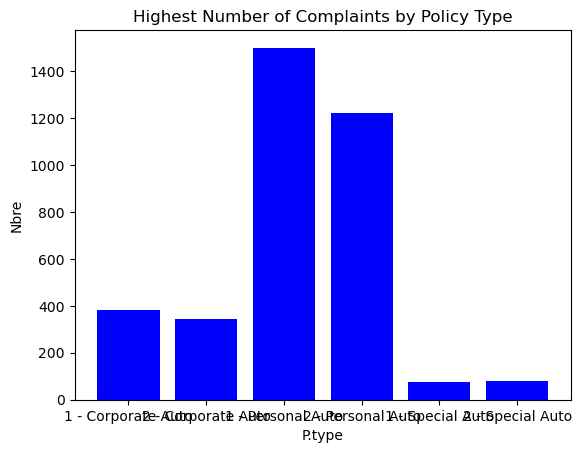

In [153]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis_clean.csv")

df = df.drop(columns=['unnamed:_0'])


#invisble column :
#marital_status                    object
#monthly_premium_auto               int64
#months_since_last_claim          float64
#months_since_policy_inception      int64
#number_of_open_complaints        float64

#rename column
df = df.rename(columns={'employmentstatus':'employment_status'})

#rename val
df['vehicle_class'] = df['vehicle_class'].replace({
    'Luxury Car' : 'Luxury',
    'Luxury SUV' : 'Luxury'})

#check value : good
#check vall null : good

#check duplicate val 
df.drop_duplicates(subset=['customer','effective_to_date','vehicle_class'],keep='first',inplace=True)
df.reset_index(drop = True)

#month best number complaint by policy type
#number_of_open_complaints
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
####### !!!!!!!!!!!!!!!!!!!!!!!!!! A REVOIR A PARTIR D'ICI !!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

df["number_of_open_complaints"] = round(df["number_of_open_complaints"], 2)
df["number_of_open_complaints"] 


filtred_df = df[["month", "policy_type", "number_of_open_complaints", "number_of_policies"]]

bmn = filtred_df.groupby(["policy_type", "month"])["number_of_open_complaints"].sum()
bmn = bmn.reset_index()


plt.bar(bmn["month"].astype(str) + " - " + bmn["policy_type"], bmn["number_of_open_complaints"], color="blue")
plt.xlabel("P.type")
plt.ylabel("Nbre")
plt.title("Highest Number of Complaints by Policy Type")
plt.show()
#r = bmn.reset_index().loc[bmn.reset_index().groupby("policy_type")["number_of_open_complaints"].idxmax()]

